# Model_1 To Detect objects

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("omartamer0").project("egyptian-id-detectr")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Egyptian-ID-Detectr-3 in yolov8:: 100%|██████████| 748/748 [00:00<00:00, 3400.32it/s]


In [ ]:

!yolo task=detect mode=train model=yolov8n.pt data='/content/Egyptian-ID-Detectr-3/data.yaml' epochs=10 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 95.7MB/s]
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Egyptian-ID-Detectr-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Egyptian-ID-Detectr-3/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


                   all         23        157      0.586        0.8      0.791      0.596
               address         10         10          1      0.925      0.995      0.876
                  demo          9          9      0.686      0.889      0.939      0.642
                   dob          9          9      0.721          1      0.924      0.688
                expiry          9          9      0.692          1      0.928      0.754
             firstName         10         10          1      0.844      0.995      0.659
            front_logo          9          9      0.833          1      0.984      0.839
       invalid_address          2          2      0.317          1      0.995      0.796
          invalid_demo          2          2          0          0      0.265      0.174
           invalid_dob          3          3      0.246          1      0.555      0.449
        invalid_expiry          2          2          1          0      0.497      0.386
     invalid_firstNam

# hyperparameter tuning

In [ ]:
!yolo task=detect model=yolov8n.pt data='/content/Egyptian-ID-Detectr-3/data.yaml' epochs=30 imgsz=640 batch=32 lr0=0.005

WARNING ⚠️ 'mode' argument is missing. Valid modes are {'export', 'train', 'track', 'predict', 'benchmark', 'val'}. Using default 'mode=train'.
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Egyptian-ID-Detectr-3/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train2/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Egyptian-ID-Detectr-3/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


                   all         23        157      0.901      0.951      0.974      0.763
               address         10         10      0.972        0.9      0.986      0.874
                  demo          9          9      0.997          1      0.995      0.803
                   dob          9          9      0.974          1      0.995      0.814
                expiry          9          9      0.999          1      0.995      0.842
             firstName         10         10          1      0.942      0.995      0.713
            front_logo          9          9       0.97          1      0.995      0.855
       invalid_address          2          2      0.567          1      0.995      0.821
          invalid_demo          2          2      0.867          1      0.995      0.747
           invalid_dob          3          3      0.935          1      0.995      0.687
        invalid_expiry          2          2      0.879          1      0.995      0.821
     invalid_firstNam

# Model_2 To Detect ID Numbers

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("egyptian-ids").project("arabic-numbers-vmdt0")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to arabic-numbers-2 in yolov8:: 100%|██████████| 3602/3602 [00:00<00:00, 5822.56it/s]


In [ ]:
#train: /content/Egyptian-ID-Detectr-3/train/images
#val: /content/Egyptian-ID-Detectr-3/valid/images
!yolo task=detect mode=train model=yolov8s.pt data='/content/arabic-numbers-2/data.yaml' epochs=20 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 244MB/s]
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/arabic-numbers-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train3/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/arabic-numbers-2/valid/labels.cache... 150 images, 1 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


                   all        150       2084      0.989      0.995      0.993      0.766
                     0        149        435      0.988      0.998      0.993      0.647
                     1        149        416      0.989      0.995      0.994      0.752
                     2        149        361      0.985      0.997      0.993      0.792
                     3         89        122          1      0.989      0.995      0.816
                     4         73        100       0.97      0.985      0.979      0.709
                     5        147        244          1      0.998      0.995       0.78
                     6         68         80      0.997      0.988      0.995      0.795
                     7         76        110      0.991      0.999      0.993      0.813
                     8        113        166      0.987          1      0.995       0.81
                     9         46         50      0.978          1      0.995      0.745
Speed: 5.5ms preproce

# Model To Detect ID Card

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("iddetection-zr0sa").project("national-id-ltfb6")
version = project.version(7)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.78, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to National-ID-7 in yolov8:: 100%|██████████| 3874/3874 [00:02<00:00, 1643.92it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/National-ID-7/data.yaml' epochs=40 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 116MB/s]
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/National-ID-7/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/National-ID-7/valid/labels.cache... 172 images, 0 backgrounds, 0 corrupt: 100%|██████████| 172/172 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


                   all        172        201      0.975      0.979      0.994      0.949
           back-bottom         10         10      0.901      0.909      0.986      0.946
             back-left         12         12      0.992          1      0.995      0.931
            back-right         14         14          1      0.937      0.995       0.96
               back-up         57         57          1      0.984      0.995      0.947
          front-bottom         18         18      0.997          1      0.995      0.934
            front-left         12         12      0.972          1      0.995      0.978
           front-right         19         19      0.941          1      0.995       0.93
              front-up         54         59      0.999          1      0.995      0.965
Speed: 2.6ms preprocess, 5.9ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val
Precision: 0.9754
Recall: 0.9787
mAP@50: 0.9939
mAP@50-95: 0.9489


In [2]:
pip install pytesseract

In [3]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ara  # Install Arabic language support

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,223 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,175 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,555 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,478 kB]
Get:14 http://securit

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

# Import important libraries

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import re
from google.colab import files


# Face without rotation


Saving 33.jpg to 33.jpg

image 1/1 /content/33.jpg: 512x640 1 front-up, 97.9ms
Speed: 5.5ms preprocess, 97.9ms inference, 2.4ms postprocess per image at shape (1, 3, 512, 640)

0: 416x640 1 address, 1 dob, 1 firstName, 1 front_logo, 1 lastName, 1 nid, 1 photo, 1 serial, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


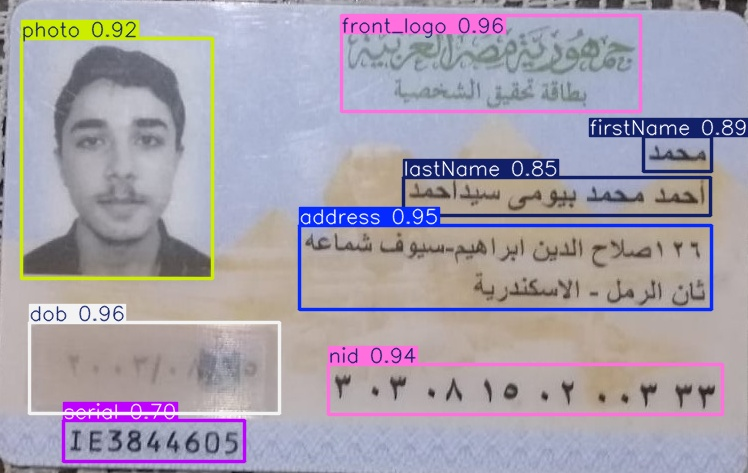

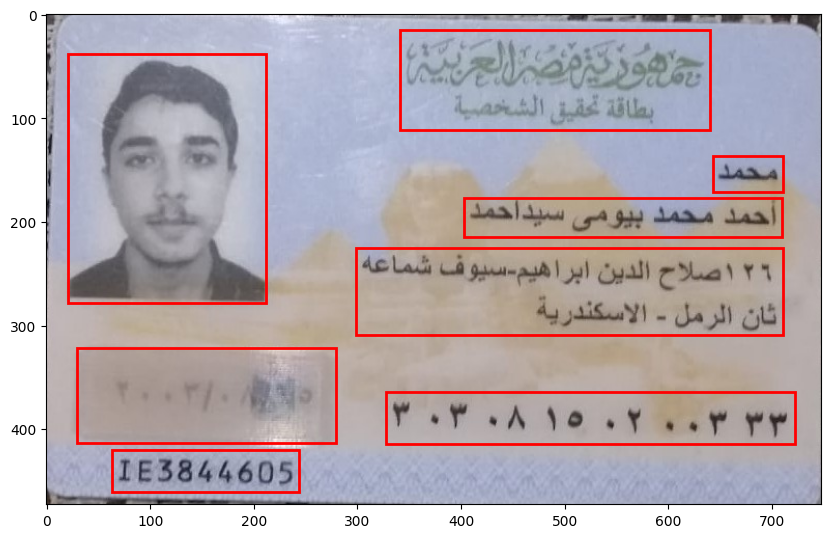


0: 128x640 5 0s, 1 1, 1 2, 5 3s, 1 5, 1 8, 129.4ms
Speed: 1.7ms preprocess, 129.4ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 640)


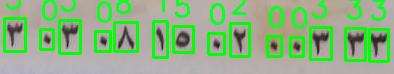

First Name: محمد
Second Name: أحمد محمد بيومى سيداحمد
Full Name: محمد أحمد محمد بيومى سيداحمد
National ID: 30308150200333
Address: اصلاح الدين ابراهيم-سيوف شماعه
ثان الرمل - الاسكندرية
Serial: ITE3844605
Birth Date: 2003-08-15
Governorate: Alexandria
Gender: Male


In [8]:

# Function to preprocess the cropped image
def preprocess_image(cropped_image):
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

# Functions for specific fields with custom OCR configurations
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]
    preprocessed_image = preprocess_image(cropped_image)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, lang=lang, config=custom_config)
    return text.strip()

# Function to detect national ID numbers in a cropped image
def detect_national_id(cropped_image):
    model = YOLO('/content/detect_id.pt')  # Load the model directly in the function
    results = model(cropped_image)
    detected_info = []

    for result in results:
        for box in result.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            detected_info.append((cls, x1))
            cv2.rectangle(cropped_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(cropped_image, str(cls), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    detected_info.sort(key=lambda x: x[1])
    id_number = ''.join([str(cls) for cls, _ in detected_info])

    cv2_imshow(cropped_image)
    return id_number

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to expand bounding box height only
def expand_bbox_height(bbox, scale=1.2, image_shape=None):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    center_x = x1 + width // 2
    center_y = y1 + height // 2
    new_height = int(height * scale)
    new_y1 = max(center_y - new_height // 2, 0)
    new_y2 = min(center_y + new_height // 2, image_shape[0])
    return [x1, new_y1, x2, new_y2]

# Function to process the cropped image
def process_image(cropped_image):
    # Load the trained YOLO model for objects (fields) detection
    model = YOLO('/content/detect_odjects.pt')
    results = model(cropped_image)

    # Variables to store extracted values
    first_name = ''
    second_name = ''
    merged_name = ''
    nid = ''
    address = ''
    serial = ''

    # Loop through the results
    for result in results:
        result.show()  # Shows the image with bounding boxes
        output_path = '/content/d2.jpg'
        result.save(output_path)
        display(Image(filename=output_path))

        boxes = [box.xyxy[0].tolist() for box in result.boxes]
        plot_image_with_boxes(cropped_image, boxes)

        for box in result.boxes:
            bbox = box.xyxy[0].tolist()
            class_id = int(box.cls[0].item())
            class_name = result.names[class_id]
            bbox = [int(coord) for coord in bbox]

            if class_name == 'firstName':
                first_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'lastName':
                second_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'serial':
                serial = extract_text(cropped_image, bbox, lang='eng')
            elif class_name == 'address':
                address = extract_text(cropped_image, bbox, lang='ara')
                address = remove_numbers(address)
            elif class_name == 'nid':
                expanded_bbox = expand_bbox_height(bbox, scale=1.5, image_shape=cropped_image.shape)
                cropped_nid = cropped_image[expanded_bbox[1]:expanded_bbox[3], expanded_bbox[0]:expanded_bbox[2]]
                nid = detect_national_id(cropped_nid)

    merged_name = f"{first_name} {second_name}"
    print(f"First Name: {first_name}")
    print(f"Second Name: {second_name}")
    print(f"Full Name: {merged_name}")
    print(f"National ID: {nid}")
    print(f"Address: {address}")
    print(f"Serial: {serial}")

    decoded_info = decode_egyptian_id(nid)
    for key, value in decoded_info.items():
        print(f"{key}: {value}")

# Function to decode the Egyptian ID number
def decode_egyptian_id(id_number):
    governorates = {
        '01': 'Cairo',
        '02': 'Alexandria',
        '03': 'Port Said',
        '04': 'Suez',
        '11': 'Damietta',
        '12': 'Dakahlia',
        '13': 'Ash Sharqia',
        '14': 'Kaliobeya',
        '15': 'Kafr El - Sheikh',
        '16': 'Gharbia',
        '17': 'Monoufia',
        '18': 'El Beheira',
        '19': 'Ismailia',
        '21': 'Giza',
        '22': 'Beni Suef',
        '23': 'Fayoum',
        '24': 'El Menia',
        '25': 'Assiut',
        '26': 'Sohag',
        '27': 'Qena',
        '28': 'Aswan',
        '29': 'Luxor',
        '31': 'Red Sea',
        '32': 'New Valley',
        '33': 'Matrouh',
        '34': 'North Sinai',
        '35': 'South Sinai',
        '88': 'Foreign'
    }

    if len(id_number) != 14:
        raise ValueError("ID number must be 14 digits long")

    century_digit = int(id_number[0])
    year = int(id_number[1:3])
    month = int(id_number[3:5])
    day = int(id_number[5:7])
    governorate_code = id_number[7:9]
    gender_code = int(id_number[12:13])

    if century_digit == 2:
        century = "1900-1999"
        full_year = 1900 + year
    elif century_digit == 3:
        century = "2000-2099"
        full_year = 2000 + year
    else:
        raise ValueError("Invalid century digit")

    gender = "Male" if gender_code % 2 != 0 else "Female"
    governorate = governorates.get(governorate_code, "Unknown")
    birth_date = f"{full_year:04d}-{month:02d}-{day:02d}"

    return {
        'Birth Date': birth_date,
        'Governorate': governorate,
        'Gender': gender
    }

# Function to detect the ID card and pass it to the existing code
def detect_and_process_id_card(image_path):
    # Load the ID card detection model
    id_card_model = YOLO('/content/detect_id_card.pt')

    # Perform inference to detect the ID card
    id_card_results = id_card_model(image_path)

    # Load the original image using OpenCV
    image = cv2.imread(image_path)

    # Crop the ID card from the image
    for result in id_card_results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            cropped_image = image[y1:y2, x1:x2]

    # Pass the cropped image to the existing processing function
    process_image(cropped_image)

# Example usage: Upload an image from your local device
uploaded = files.upload()  # Upload the image

for filename in uploaded.keys():
    detect_and_process_id_card(filename)  # Use the uploaded image


# Face with rotation


In [ ]:
import cv2
import pytesseract
from ultralytics import YOLO
from IPython.display import Image, display
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import re
from google.colab import files
from PIL import Image as PILImage
import numpy as np
# Function to preprocess the cropped image
def preprocess_image(cropped_image):
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

# Functions for specific fields with custom OCR configurations
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]
    preprocessed_image = preprocess_image(cropped_image)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, lang=lang, config=custom_config)
    return text.strip()

# Function to detect national ID numbers in a cropped image
def detect_national_id(cropped_image):
    model = YOLO('/content/detect_id.pt')  # Load the model directly in the function
    results = model(cropped_image)
    detected_info = []

    for result in results:
        for box in result.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            detected_info.append((cls, x1))
            cv2.rectangle(cropped_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(cropped_image, str(cls), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    detected_info.sort(key=lambda x: x[1])
    id_number = ''.join([str(cls) for cls, _ in detected_info])

    cv2_imshow(cropped_image)
    return id_number

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to expand bounding box height only
def expand_bbox_height(bbox, scale=1.2, image_shape=None):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    center_x = x1 + width // 2
    center_y = y1 + height // 2
    new_height = int(height * scale)
    new_y1 = max(center_y - new_height // 2, 0)
    new_y2 = min(center_y + new_height // 2, image_shape[0])
    return [x1, new_y1, x2, new_y2]

# Function to process the cropped image
def process_image(cropped_image):
    # Load the trained YOLO model for objects (fields) detection
    model = YOLO('/content/detect_odjects.pt')
    results = model(cropped_image)

    # Variables to store extracted values
    first_name = ''
    second_name = ''
    merged_name = ''
    nid = ''
    address = ''
    serial = ''

    # Loop through the results
    for result in results:
        result.show()  # Shows the image with bounding boxes
        output_path = '/content/d2.jpg'
        result.save(output_path)
        display(Image(filename=output_path))

        boxes = [box.xyxy[0].tolist() for box in result.boxes]
        plot_image_with_boxes(cropped_image, boxes)

        for box in result.boxes:
            bbox = box.xyxy[0].tolist()
            class_id = int(box.cls[0].item())
            class_name = result.names[class_id]
            bbox = [int(coord) for coord in bbox]

            if class_name == 'firstName':
                first_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'lastName':
                second_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'serial':
                serial = extract_text(cropped_image, bbox, lang='eng')
            elif class_name == 'address':
                address = extract_text(cropped_image, bbox, lang='ara')
                address = remove_numbers(address)
            elif class_name == 'nid':
                expanded_bbox = expand_bbox_height(bbox, scale=1.5, image_shape=cropped_image.shape)
                cropped_nid = cropped_image[expanded_bbox[1]:expanded_bbox[3], expanded_bbox[0]:expanded_bbox[2]]
                nid = detect_national_id(cropped_nid)

    merged_name = f"{first_name} {second_name}"
    print(f"First Name: {first_name}")
    print(f"Second Name: {second_name}")
    print(f"Full Name: {merged_name}")
    print(f"National ID: {nid}")
    print(f"Address: {address}")
    print(f"Serial: {serial}")

    decoded_info = decode_egyptian_id(nid)
    for key, value in decoded_info.items():
        print(f"{key}: {value}")

# Function to decode the Egyptian ID number
def decode_egyptian_id(id_number):
    governorates = {
        '01': 'Cairo',
        '02': 'Alexandria',
        '03': 'Port Said',
        '04': 'Suez',
        '11': 'Damietta',
        '12': 'Dakahlia',
        '13': 'Ash Sharqia',
        '14': 'Kaliobeya',
        '15': 'Kafr El - Sheikh',
        '16': 'Gharbia',
        '17': 'Monoufia',
        '18': 'El Beheira',
        '19': 'Ismailia',
        '21': 'Giza',
        '22': 'Beni Suef',
        '23': 'Fayoum',
        '24': 'El Menia',
        '25': 'Assiut',
        '26': 'Sohag',
        '27': 'Qena',
        '28': 'Aswan',
        '29': 'Luxor',
        '31': 'Red Sea',
        '32': 'New Valley',
        '33': 'Matrouh',
        '34': 'North Sinai',
        '35': 'South Sinai',
        '88': 'Foreign'
    }

    if len(id_number) != 14:
        raise ValueError("ID number must be 14 digits long")

    century_digit = int(id_number[0])
    year = int(id_number[1:3])
    month = int(id_number[3:5])
    day = int(id_number[5:7])
    governorate_code = id_number[7:9]
    gender_code = int(id_number[12:13])

    if century_digit == 2:
        century = "1900-1999"
        full_year = 1900 + year
    elif century_digit == 3:
        century = "2000-2099"
        full_year = 2000 + year
    else:
        raise ValueError("Invalid century digit")

    gender = "Male" if gender_code % 2 != 0 else "Female"
    governorate = governorates.get(governorate_code, "Unknown")
    birth_date = f"{full_year:04d}-{month:02d}-{day:02d}"

    return {
        'Birth Date': birth_date,
        'Governorate': governorate,
        'Gender': gender
    }

# Function to process image rotation before further processing
def process_detected_image(image_path):
    # Load the trained model
    model = YOLO('/content/detect_id_card.pt')

    # Perform inference on the image
    results = model(image_path)

    # Load the original image
    img = PILImage.open(image_path)

    # Initialize variable for rotated image
    rotated_img = img.copy()  # Make a copy of the image

    # Loop through the results
    for result in results:
        # Loop through the detected objects
        for box in result.boxes:
            # Get the class name
            class_name = result.names[box.cls[0].item()]
            print(f"Detected Class: {class_name}")

            # Rotate the image based on the class name
            if class_name == "front-right":
                rotated_img = img.rotate(-90, expand=True)  # Rotate 90 degrees to the right
                print(f"Rotated image 90 degrees to the right for class: {class_name}")
            elif class_name == "front-left":
                rotated_img = img.rotate(90, expand=True)  # Rotate 90 degrees to the left
                print(f"Rotated image 90 degrees to the left for class: {class_name}")
            elif class_name == "front-bottom":
                rotated_img = img.rotate(180, expand=True)  # Rotate 180 degrees
                print(f"Rotated image 180 degrees for class: {class_name}")
            elif class_name == "front-up":
                rotated_img = img.rotate(0, expand=True)  # Rotate 180 degrees
                print(f"image doesn't need to rotate: {class_name}")

    # Convert the PIL image back to OpenCV format
    rotated_image_cv2 = cv2.cvtColor(np.array(rotated_img), cv2.COLOR_RGB2BGR)

    # Display the rotated image
    display(rotated_img)

    return rotated_image_cv2

# Function to detect the ID card and pass it to the existing code
def detect_and_process_id_card(image_path):
    # Process the detected image for rotation
    rotated_image = process_detected_image(image_path)

    # Crop the ID card from the rotated image
    id_card_model = YOLO('/content/detect_id_card.pt')
    id_card_results = id_card_model(rotated_image)

    # Load the original image using OpenCV
    for result in id_card_results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            cropped_image = rotated_image[y1:y2, x1:x2]

    # Pass the cropped image to the existing processing function
    process_image(cropped_image)

# Example usage: Upload an image from your local device
uploaded = files.upload()  # Upload the image

for filename in uploaded.keys():
    detect_and_process_id_card(filename)  # Use the uploaded image

# Back

Saving OIP.jpeg to OIP.jpeg

image 1/1 /content/OIP.jpeg: 416x640 1 back-up, 35.2ms
Speed: 2.3ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 demo, 1 expiry, 1 issue, 1 job, 1 nid_back, 1 watermark_tut, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


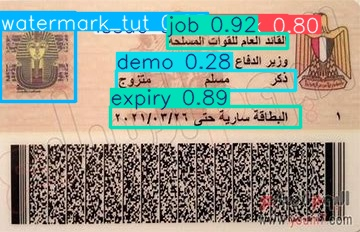

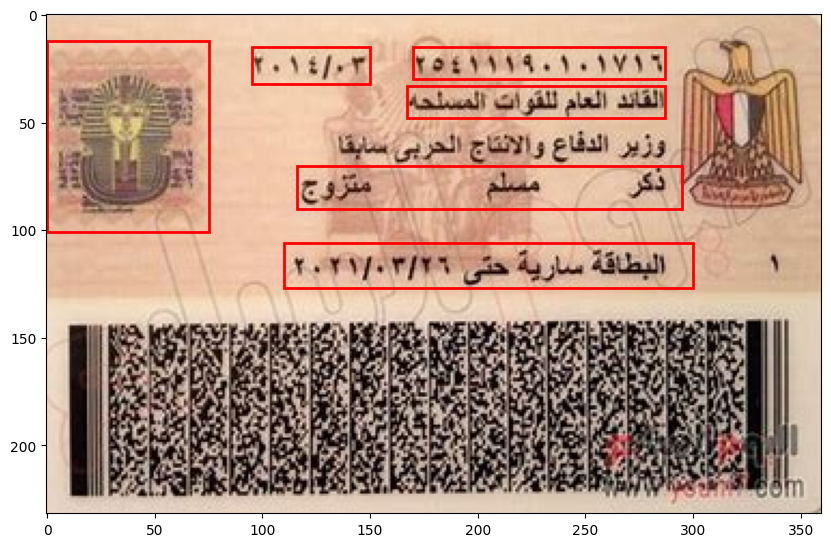

Job: القاتد العام للقوات العسلحه


In [9]:
import cv2
import pytesseract
from ultralytics import YOLO
from IPython.display import Image, display
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload file
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the filename of the uploaded file

# Load the YOLO models
model_id_card = YOLO('/content/detect_id_card.pt')  # Model for detecting ID cards
model_job = YOLO('/content/detect_odjects.pt')  # Model for extracting job field

# Function to extract text using Tesseract OCR
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]

    # Visualize the cropped region to verify it covers the correct area
    cv2_imshow(cropped_image)

    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(cropped_image, lang=lang, config=custom_config)
    return text.strip()

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to detect ID card using the ID card detection model
def detect_id_card(image_path, model):
    results = model(image_path)
    image = cv2.imread(image_path)

    id_card_bboxes = []
    for result in results:
        # Extract bounding boxes
        id_card_bboxes.extend([box.xyxy[0].tolist() for box in result.boxes])

    return image, id_card_bboxes

# Function to process ID card image and extract job field
def process_image(image_path, model_id_card, model_job):
    # Detect ID card
    image, id_card_bboxes = detect_id_card(image_path, model_id_card)

    # Assuming only one ID card detected, process the first one
    if id_card_bboxes:
        bbox = id_card_bboxes[0]  # Get the first detected ID card bbox

        # Crop the ID card region
        x1, y1, x2, y2 = [int(coord) for coord in bbox]
        id_card_image = image[y1:y2, x1:x2]

        # Use the cropped ID card image as input for the job detection model
        results = model_job(id_card_image)  # Pass the cropped image directly

        # Loop through the results
        job = ''
        for result in results:
            # Display the results
            result.show()  # Shows the image with bounding boxes

            # Save the output image
            output_path = '/content/job_output.jpg'
            result.save(output_path)

            # Visualize the saved output image
            display(Image(filename=output_path))

            # Extract bounding boxes and class names
            boxes = [box.xyxy[0].tolist() for box in result.boxes]
            plot_image_with_boxes(id_card_image, boxes)  # Use id_card_image for plotting

            # Extract text for the "job" field
            for box in result.boxes:
                bbox = box.xyxy[0].tolist()  # Get bounding box coordinates
                class_id = int(box.cls[0].item())  # Get class ID
                class_name = result.names[class_id]  # Get class name

                # Convert bounding box coordinates to integers
                bbox = [int(coord) for coord in bbox]

                if class_name == 'job':
                    job = extract_text(id_card_image, bbox, lang='ara')

        # Print the extracted value
        print(f"Job: {job}")
    else:
        print("No ID card detected")

# Call the function to process the image
process_image(image_path, model_id_card, model_job)
